In [80]:
import urllib

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
import string
from nltk import pos_tag

In [3]:
# https://en.wikipedia.org/wiki/Rajgad_Fort
url= urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')

In [4]:
url

In [5]:
data = url.read()

In [6]:
print(data)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Rajgad Fort - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinn

In [8]:
data.decode('utf-8') 

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Rajgad Fort - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinne

In [10]:
url= urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')
data=url.readline()

In [11]:
data

b'<!DOCTYPE html>\n'

In [12]:
data=url.readline()

In [13]:
data

b'<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">\n'

In [14]:
url= urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')
data=url.read()

In [16]:
data= data.decode('utf-8')
data.find('<title>')

666

In [17]:
end= data.find('</title>')
end

696

In [21]:
url= urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')
data=url.read()

In [24]:
start=data.find('<title>')

In [26]:
data[start+7:end]

'Rajgad Fort - Wikipedia'

In [31]:
data.count('<img')

29

In [32]:
import re

In [33]:
pattern= "<title.*?>.*?</title.*?>"
match_result= re.search(pattern, data, re.IGNORECASE)
title= match_result.group()
title=re.sub("<.*?>","",title)  #remove html tags

print(title)

Rajgad Fort - Wikipedia


In [35]:
len(re.findall('<img.*?',data)) # to find the total count of images on the page

29

In [51]:
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

In [37]:
soup = BeautifulSoup(data,'html.parser')

In [42]:
text= soup.get_text()

In [43]:
text

'\n\n\n\nRajgad Fort - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload file\n\n\n\n\n\nLanguages\n\nLanguage links are at the top of the page across from the title.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCreate account\n\nLog in\n\n\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\n Create account Log in\n\n\n\n\n\n\t\tPages for logged out editors learn more\n\n\n\nContributionsTalk\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nContents\nmove to sidebar\nhide\n\n\n\n\n(Top)\n\n\n\n\n\n1History\n\n\n\nToggle History subsection\n\n\n\n\n\n1.1List of chronological events\n\n\n\n\n\n\

In [45]:
text= soup.get_text(strip=True)

In [46]:
text

'Rajgad Fort - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileLanguagesLanguage links are at the top of the page across from the title.SearchSearchCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1HistoryToggle History subsection1.1List of chronological events2Tourism3Gallery4See also5References6External linksToggle the table of contentsRajgad Fort7 languagesEspañolहिन्दीमराठीمصرىनेपाल भाषाپنجابیاردوEdit linksArticleTalkEnglishReadEditView historyToolsToolsmove to sidebarhideActionsReadEditView historyGeneralWhat links hereRelated changesUpload fileSpecial pagesPermanent linkPage informationCite this pageGet shortened URLWikidata itemPrint/exportDownload as PDFPrintable versionIn other projectsWikimedia CommonsWikivoyageCoordinate

In [47]:
text= soup.get_text()
print(text)





Rajgad Fort - Wikipedia




































Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload file





Languages

Language links are at the top of the page across from the title.



















Search











Search





























Create account

Log in








Personal tools





 Create account Log in





		Pages for logged out editors learn more



ContributionsTalk




























Contents
move to sidebar
hide




(Top)





1History



Toggle History subsection





1.1List of chronological events









2Tourism







3Gallery







4See also







5References







6External links

















Toggle the table of contents







Rajgad Fort



7 languages




Españolहिन्दीमराठीمصرىनेपाल भाषाپنجابیاردو

Edit links











Ar

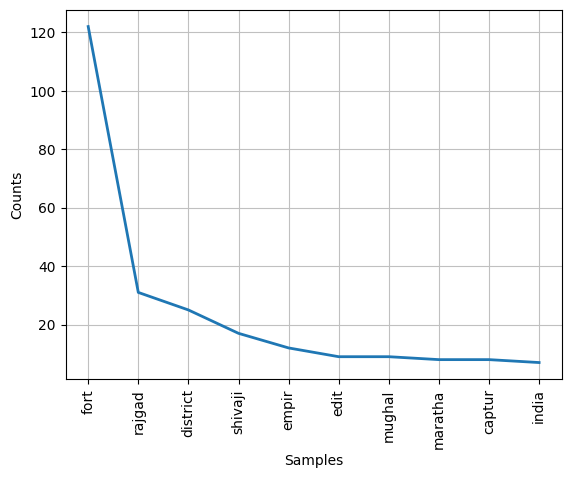

[('fort', 122), ('rajgad', 31), ('district', 25)]

In [64]:

from nltk.stem import PorterStemmer

url= urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')
data=url.read()

ps=PorterStemmer()

soup=BeautifulSoup(data,'html.parser')
text= soup.get_text()

tokens= word_tokenize(text)
sword= stopwords.words('english')

token1=[x.lower() for x in tokens if x.isalpha() or x.isdigit()]
token2=[ps.stem(x) for x in token1 if x not in sword]

freq= FreqDist(token2)
freq.plot(10)
freq.most_common(3)

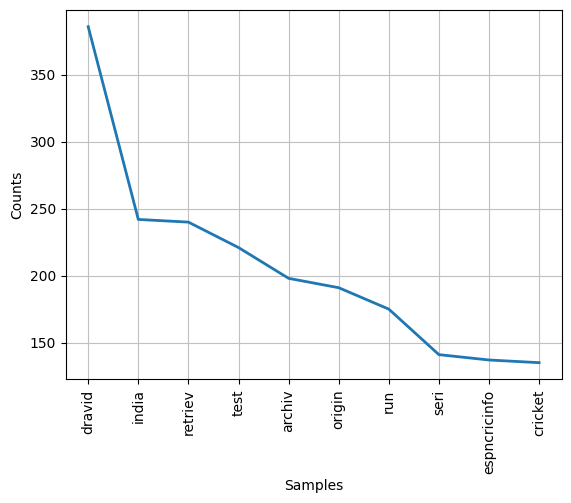

[('dravid', 386), ('india', 242), ('retriev', 240)]

In [67]:
url= urllib.request.urlopen('https://en.wikipedia.org/wiki/Rahul_Dravid')
data=url.read()

ps=PorterStemmer()

soup=BeautifulSoup(data,'html.parser')
text= soup.get_text()

tokens= word_tokenize(text)
sword= stopwords.words('english')

token1=[x.lower() for x in tokens if x.isalpha() or x.isdigit()]
token2=[ps.stem(x) for x in token1 if x not in sword]

freq= FreqDist(token2)
freq.plot(10)
freq.most_common(3)

In [70]:
!pip install pygooglenews

  Using cached pygooglenews-0.1.2-py3-none-any.whl (10 kB)
  Using cached dateparser-0.7.6-py2.py3-none-any.whl (362 kB)
  Using cached feedparser-5.2.1.zip (1.2 MB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error in feedparser setup command: use_2to3 is invalid.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [69]:
from pygooglenews import GoogleNews

ModuleNotFoundError: No module named 'pygooglenews'

In [71]:
gn= GoogleNews()
s= gn.search('Cricket Worldcup')

for entry in s['entries']:
    print(entry['title'])
    print('------------------------------------------')

NameError: name 'GoogleNews' is not defined

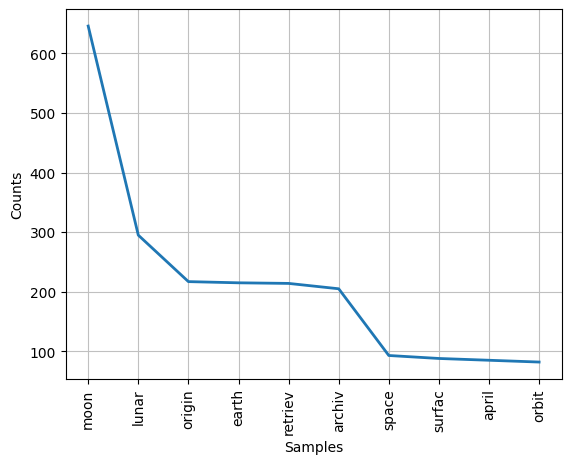

[('moon', 646), ('lunar', 295), ('origin', 217)]

In [82]:
url= urllib.request.urlopen('https://en.wikipedia.org/wiki/Moon')
data=url.read()

wnl= WordNetLemmatizer()

soup=BeautifulSoup(data,'html.parser')
text= soup.get_text()

tokens= word_tokenize(text)
sword= stopwords.words('english')

token1=[x.lower() for x in tokens if x.isalpha()]
tags= pos_tag(token1)
token2=[ps.stem(x) for x in token1 if x not in sword]
token3= [wnl.lemmatize(x,'v') for x in token2 if x not in sword]

freq= FreqDist(token3)
freq.plot(10)
freq.most_common(3)

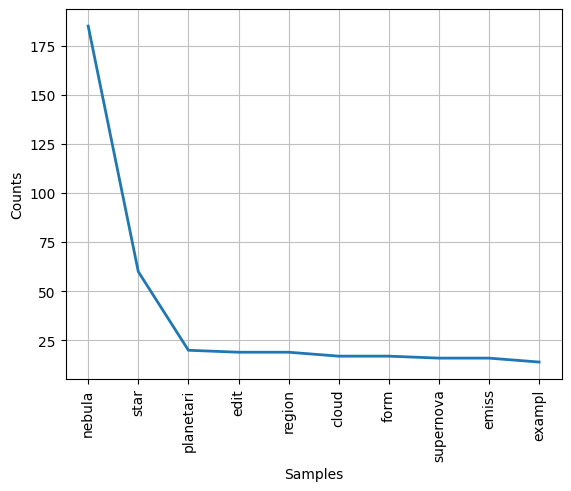

[('nebula', 185), ('star', 60), ('planetari', 20)]

In [84]:
url= urllib.request.urlopen('https://en.wikipedia.org/wiki/Nebula')
data=url.read()

wnl= WordNetLemmatizer()

soup=BeautifulSoup(data,'html.parser')
text= soup.get_text()

tokens= word_tokenize(text)
sword= stopwords.words('english')

token1=[x.lower() for x in tokens if x.isalpha()]
tags= pos_tag(token1)
token2=[ps.stem(x) for x in token1 if x not in sword]
token3= [wnl.lemmatize(x,'v') for x in token2 if x not in sword]

freq= FreqDist(token3)
freq.plot(10)
freq.most_common(3)

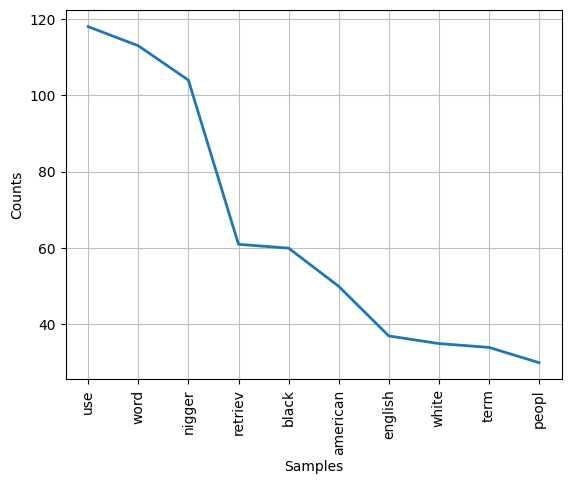

[('use', 118), ('word', 113), ('nigger', 104)]

In [85]:
url= urllib.request.urlopen('https://en.wikipedia.org/wiki/Nigger')
data=url.read()

wnl= WordNetLemmatizer()

soup=BeautifulSoup(data,'html.parser')
text= soup.get_text()

tokens= word_tokenize(text)
sword= stopwords.words('english')

token1=[x.lower() for x in tokens if x.isalpha()]
tags= pos_tag(token1)
token2=[ps.stem(x) for x in token1 if x not in sword]
token3= [wnl.lemmatize(x,'v') for x in token2 if x not in sword]

freq= FreqDist(token3)
freq.plot(10)
freq.most_common(3)

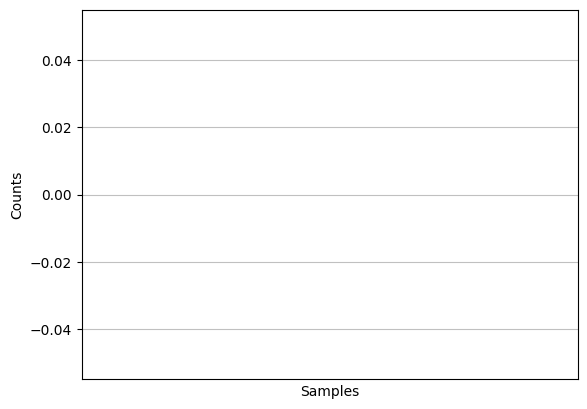

[]

In [103]:
url= urllib.request.urlopen('https://en.wikipedia.org/wiki/Moon')
data=url.read()

wnl= WordNetLemmatizer()

soup=BeautifulSoup(data,'html.parser')
text= soup.get_text()

tokens= word_tokenize(text)
sword= stopwords.words('english')

token1=[x for x in tokens if x.isalpha()]
tags= pos_tag(token1)
token2=[word[0].lower() for x in token1 if word[1].startswith('v')]
token3= [wnl.lemmatize(x,'v') for x in token2 if x not in sword]

freq= FreqDist(token3)
freq.plot(10)
freq.most_common(3)